# Introduction to NLP Fundamentals in TensorFlow

NLP has the goal of deriving information out of natural language (could be sequence text or speech)

Another commen term for NLP problem is sequence to sequence problems(seq2seq)

In [ ]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-4efcd461-d592-6deb-b2aa-295e396e854e)


In [ ]:
## Get Helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2022-02-25 08:00:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-02-25 08:00:47 (86.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a Text Dataset

The dataset used in this notebook is from Kaggle's introduction to NLP Dataset (text samples of Tweets labelled as disaster or not disaster).

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
unzip_data("nlp_getting_started.zip")

--2022-02-25 08:00:49--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2022-02-25 08:00:49 (105 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Becoming one with the data: Visualizing a text dataset

To visualize our text samples, we first have to read them in....

In [ ]:
# another way
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [ ]:
#Shuffle training dataframe
train_df_shuffled =train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# What does the test dataframe looks like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# How many samples in test and train samples?
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Visualize some random sample of training data
import random
random_index = random.randint(0,len(train_df)-5) # Creating random indexes not higher than the 
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _,text, target = row
  print(f"Target: {target}","real disater" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("_ _ _\n")

Target: 0 (not real disaster)
Text:
Vanderbilt: First Do No Harm http://t.co/cCdx7CGlQW

_ _ _

Target: 1 real disater
Text:
Typhoon Soudelor: When will it hit Taiwan ÛÒ and how bad will it be? #GeneralNews http://t.co/cWZHgEzAJ4

_ _ _

Target: 1 real disater
Text:
@Yankees body bagging mfs

_ _ _

Target: 0 (not real disaster)
Text:
#RolandoNaBeats: Ellie Goulding - My Blood | Acesse nosso site para ouvir! http://t.co/Zk69uGXMT8

_ _ _

Target: 1 real disater
Text:
Another White mass murderer. Thank God I live in California.  https://t.co/4COg0OTiWn

_ _ _



### Spliting data into train and validation sets


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # using 10% of training data
                                                                            random_state=42)

In [ ]:
# cheking the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
 # Checking the first 10 samples
 train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

### Converting text data to numbers

When dealing with the text problem, one of the first thing we'll have to do before we build our model is to convert our text into numbers.

This can be done in few ways:

* Tokenization: direct mapping of token (a token could be a word or a character) to a number.
* Embedding: Create a matrix of feature vectore for each token (the size of the feature vector can be defined and this embedding can be learned)

### Text vectorization(tokenization)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (automatically add a token like this <OOV>)
standardize="lower_and_strip_punctuation",
split="whitespace",
ngrams=None, # create groups of n-words
output_mode="int", # how to map tokens to numbers
output_sequence_length=None) # how long do we want our sequence to be
#pad_to_max_tokens=True)# Not valid if using max_tokens=None

In [ ]:
train_sentences[0].split()

['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet']

In [ ]:
len(train_sentences[0].split())

7

In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max lengths our sequences will be (e.g how many words from a tweet does a model sees)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fitting the text vectorizer to the training data using the adapt() method
text_vectorizer.adapt(train_sentences)

In [ ]:
# Creating sample sentence and tokenize it
sample_sentence = "There is a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,
          0,   0]])>

There: 74

is: 9

a: 3

flood: 232

in: 4

my: 13

street!: 698

the extra 0's are because we padded it to be of max_length 15

and hence the tensor is of shape(1, 15)

In [ ]:
# Choose a random sentence from training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
      \n\nVectorized text:\n {text_vectorizer([random_sentence])}")

Original text:
 China's Stock Market Crash: Are There Gems In The Rubble? http://t.co/o6oNSjHCsD #tcot #p2 #news      

Vectorized text:
 [[1034  413  457   85   22   74  948    4    2  643    1 1954    1   58
     0]]


In [ ]:
# Get the unique words in the vocubulary
words_in_vocab =text_vectorizer.get_vocabulary() # get all the unique words in the dataset
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words =words_in_vocab[-5:] # get the least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Most common words:{top_5_words}")
print(f"Least common words:{bottom_5_words}")

Number of words in vocab: 10000
Most common words:['', '[UNK]', 'the', 'a', 'in']
Least common words:['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


[UNK]: unkown, as in outside the vocab size

### Creating Embedding!!!

Using TensorFlows Embedding layer [**Turns positive integer(indexes) into dense vector of fixed size**]

The parameters we care most about for our embeding layer:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
* `input_length`= length of the sequence to be passed to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, #output shape
                             input_length=max_length #how long is each input
                             )
embedding

In [ ]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
        \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation, aka tokenization first)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
just in: #kenya: several buildings are reported to be on fire close to dam estate #langata at 2:22pm.        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-4.0074788e-02,  6.3534267e-03, -1.4069725e-02, ...,
          4.4976342e-02,  4.9426708e-02,  2.7227554e-02],
        [-2.2352958e-02, -3.4279935e-03,  2.5818478e-02, ...,
         -7.4196607e-05,  2.0181309e-02,  3.1221297e-02],
        [ 4.2466667e-02, -3.7030149e-02,  9.9989660e-03, ...,
         -3.9341282e-02,  3.1756449e-02, -1.2142397e-02],
        ...,
        [-4.8588626e-03,  3.4470011e-02,  3.4577098e-02, ...,
         -3.3815503e-03, -3.8003102e-03, -2.5392091e-02],
        [ 2.5452599e-03, -2.2058560e-02, -5.3131096e-03, ...,
         -2.5466561e-02, -3.2430172e-02, -4.0037978e-02],
        [ 2.2794712e-02, -1.8190481e-02,  2.6329685e-02, ...,
          1.9727562e-02, -4.6378709e-02, -1.5429474e-02]]], dtype=float32)>

In [ ]:
# check out a single token's embeding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.04007479,  0.00635343, -0.01406972,  0.02914147,  0.03328551,
         0.00818801,  0.03505578,  0.0485559 ,  0.01563846, -0.04223811,
         0.01921985,  0.01391378, -0.01572574, -0.04755208, -0.02315749,
        -0.03919003,  0.03354985,  0.00133177, -0.01413587,  0.04754776,
         0.04173751,  0.013223  , -0.0162644 ,  0.01547737,  0.01513037,
        -0.01229863, -0.03742517, -0.03642063, -0.005006  ,  0.00796844,
        -0.0457415 ,  0.0340132 ,  0.00095119, -0.00037314, -0.03773214,
        -0.0394618 , -0.04721237, -0.03153749, -0.03427335, -0.00967655,
         0.04167422,  0.04137821, -0.0015457 , -0.04543265, -0.01020298,
        -0.04364715,  0.02932825,  0.04607496, -0.01368988,  0.01141285,
        -0.02108924, -0.0016328 , -0.0496688 , -0.019581  ,  0.01666704,
         0.0197613 ,  0.00782018, -0.03476759, -0.00622219, -0.03527166,
         0.03940653,  0.04350078,  0.02612293,  0.03782351, -0.04835236,
  

## Modelling a text dataset (Running a series of experiments)

* Model 0: Naive Bayes (baseline)
* MOdel 1: Feed-forward neural network
* Model 2: LSTM model(RNN)
* Model 3: GRU(RNN)
* Model 4: Bidirectional-LSTM(RNN)
* Modle 5: 1D-Convolution neural network
* Model 6: Transfer Lerning feature Extractor
* Model 7: Transfer Learning feature extractor (10% of the training data)

How to approach?
* create a mdoel (baseline)
* Build a model
* Fit the model
* Evaluate our model

### Model 0: Creating a baseline model

As with all machine learning modelling experiments, it's important to create a baseline model so that we have a benchmark for future experiments to build upon.

To create our baseline,we'll create a Scikit-Learn Pipeline using TF-IDF (Term Frequency-Inverse Documnet Frequency) formula to convert our words to numbers and then model them with **Multinonial Naive Bayes algorith**.

**Note** It is a common practice to use non-DL algo as baseline because of their speed

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modellin pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # Convert words to numbers
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences,val_labels)
print(f"Our baseline model achieves accuracy of:{baseline_score*100:.2f}%")

Our baseline model achieves accuracy of:79.27%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

### Creating an evluation funtion for our model experiments

Let's make a funtion to evaluate our modelling experiments predictions using:
* Accuracy
* Precision
* Recall
* F1-Score

**Note** Since we're dealing with a classification problem, the above metrics are the most appropriate. If we were working with a regression priblem, other metrics such as MAE (mean absolute error) would be a better choice


In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true,y_pred):
  """
  Calculate model accuracy, precision, recall, f1-score of binary classification model:
  Args:
  y_true = true labels in the form of a 1d array
  y_pred = predicted labels in the form of 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred)* 100
  # Calculate model precision, recall and f1-score using 'weighted' average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true,y_pred,average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1-Score": model_f1}
  return model_results

In [ ]:
# getting baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1-Score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 1: Feed Forward Neural Network (dense model)

In [ ]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR ="model_logs"

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) # Inputs are 1-dimentional string
x = text_vectorizer(inputs) # turn the input text to numbers
x = embedding(x) # create an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x) # Condense the feature vector for each token to one vector
outputs = layers.Dense(1, activation="sigmoid")(x) # Create the output layer, want a binary output so sctivation is sigmoid
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

In [ ]:
# Fit the model
model_1.history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])
                              

Saving TensorBoard log files to: model_logs/model_1_dense/20220225-080055
Epoch 1/5
215/215 [==============================] - 5s 7ms/step - loss: 0.6120 - accuracy: 0.6992 - val_loss: 0.5362 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.4438 - accuracy: 0.8192 - val_loss: 0.4738 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.3483 - accuracy: 0.8602 - val_loss: 0.4570 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2851 - accuracy: 0.8905 - val_loss: 0.4629 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2384 - accuracy: 0.9121 - val_loss: 0.4807 - val_accuracy: 0.7808


In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7808


[0.4806828498840332, 0.7808399200439453]

In [ ]:
# Make predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

array([[0.3644932 ],
       [0.81728446],
       [0.9976234 ],
       [0.13670303],
       [0.10574865],
       [0.93847   ],
       [0.906997  ],
       [0.99191564],
       [0.96518975],
       [0.3098298 ]], dtype=float32)

In [ ]:
# Convert model prediction probalities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
# Calculate our model_1_results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.08398950131233,
 'f1-Score': 0.7779792730264676,
 'precision': 0.7848699684611963,
 'recall': 0.7808398950131233}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1-Score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [ ]:
import numpy as np
np.array(list(model_1_results.values()))> np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing learned embedding 

In [ ]:
# model_1 Summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of embedding layer
# (These are the numerical representations of each token in our training data, which have been learned)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights 
print(embed_weights.shape) # same size as vocab size and embedding-dims(output)

(10000, 128)


In [ ]:
# Creating embedding files (from Tensor)
import io

# Code to save trained embeddings to file - we got this from here: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Let's download the saved embeddings locally
"""
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass
  """

"\ntry:\n  from google.colab import files\n  files.download('vectors.tsv')\n  files.download('metadata.tsv')\nexcept Exception:\n  pass\n  "

Our visual word embeddings might not look like much to us, but they help our model understand the relationships between words.

For more on a popular type of word embedding and more visual explanations check out the illustrated word2vec: https://jalammar.github.io/illustrated-word2vec/

## Recurrent Neural Network (RNN)

RNN's are useful for sequence of data.

The premise of RNN is to use the representation of previous input to aid the representation of later input.

resource: 
* MIT Deep learning(sequence modelling lecture)
* Chris Olah's intro to LSTM
* Andrej Karpathy's the unreasonable effectiveness of RNN

### Model_2:LSTM

LSTM = Long Short Term Memory

Our structure of an RNN typically looks like:
```
Input (text) -> Tokenize -> Embedding -> Layers (RNN/Dense) -> Output (label probability)
```

In [ ]:
# Create model_2:LSTM
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#print(f"After embedding: {x.shape}")
#x = layers.LSTM(64, retrun_sequence=True)(x) # When we are stacking RNN cells together set return_sequence=True
#print(x.shape)
x = layers.LSTM(64)(x)
#print(x.shape)
# x = layers.Dense(64, activation="relu")(x)
# print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 =tf.keras.Model(inputs, outputs, name="model_2_LSTM")


In [ ]:
# Get summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                      "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220225-080108
Epoch 1/5
215/215 [==============================] - 7s 12ms/step - loss: 0.2190 - accuracy: 0.9251 - val_loss: 0.5612 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1560 - accuracy: 0.9413 - val_loss: 0.6358 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1274 - accuracy: 0.9514 - val_loss: 0.6747 - val_accuracy: 0.7848
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1030 - accuracy: 0.9594 - val_loss: 0.7931 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0837 - accuracy: 0.9666 - val_loss: 0.8972 - val_accuracy: 0.7769


In [ ]:
# Make predictions with LSTM Model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[1.9465027e-02],
       [5.1376098e-01],
       [9.9970824e-01],
       [9.2670038e-02],
       [8.8134204e-04],
       [9.9916661e-01],
       [8.1098390e-01],
       [9.9983025e-01],
       [9.9971610e-01],
       [5.8626306e-01]], dtype=float32)

In [ ]:
# Convert model_2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model_2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.69028871391076,
 'f1-Score': 0.7750036673315875,
 'precision': 0.7784265812728361,
 'recall': 0.7769028871391076}

### Model_3: GRU

GRU: Gated Recurrent Unit

The GRU cell has similar features to a LSTM but has less parameter.


In [ ]:
# Model_3
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
#print(x.shape)
#x = layers.GRU(64, return_sequences=True)(x) # if we want to stack recurrent
#print(x.shape)
#x = layers.LSTM(64, return_sequences=True)(x)
#print(x.shape)
#x = layers.GRU(99)(x)
#print(x.shape)
#x = layers.Dense(64, activation="relu")(x)
#x= layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Compile model_3 (GRU)
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20220225-080132
Epoch 1/5
215/215 [==============================] - 5s 12ms/step - loss: 0.1515 - accuracy: 0.9375 - val_loss: 0.8142 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0823 - accuracy: 0.9698 - val_loss: 0.8463 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0682 - accuracy: 0.9727 - val_loss: 0.9350 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0616 - accuracy: 0.9756 - val_loss: 0.9200 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0518 - accuracy: 0.9781 - val_loss: 1.1867 - val_accuracy: 0.7730


In [ ]:
# Make predictions with the trained model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10], model_3_pred_probs.shape

(array([[7.8633853e-04],
        [9.4227153e-01],
        [9.9992931e-01],
        [5.4586891e-02],
        [8.6187014e-05],
        [9.9983466e-01],
        [8.6387783e-01],
        [9.9996424e-01],
        [9.9993730e-01],
        [8.7579411e-01]], dtype=float32), (762, 1))

In [ ]:
# Convert model 3 pred probs into labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate results for model 3
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.29658792650919,
 'f1-Score': 0.7710949612836401,
 'precision': 0.7742755789705,
 'recall': 0.7729658792650919}

### Model_4: Bidirectional RNN Model

Normal RNN go from left to right (just like you'd read an English sentences), however, a bidirectional RNN go from left to right as well as right to left.

In [ ]:
# Create a model_4: Bidirectional RNN
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs,outputs, name="model_4_Bidirectional_RNN")

In [ ]:
# Compile the model_4
model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
# Model_4 Summary
model_4.summary()

Model: "model_4_Bidirectional_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params:

In [ ]:
# Fit the model
history_4 = model_4.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                               "Bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/Bidirectional_RNN/20220225-080147
Epoch 1/5
215/215 [==============================] - 8s 18ms/step - loss: 0.1104 - accuracy: 0.9647 - val_loss: 0.9999 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0534 - accuracy: 0.9778 - val_loss: 1.1785 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0437 - accuracy: 0.9797 - val_loss: 1.2659 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0462 - accuracy: 0.9799 - val_loss: 1.2214 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0405 - accuracy: 0.9818 - val_loss: 1.4118 - val_accuracy: 0.7664


In [ ]:
# Making Predictions on the model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[4.9587898e-04],
       [4.9973312e-01],
       [9.9994671e-01],
       [2.7804857e-01],
       [2.5048315e-05],
       [9.9985564e-01],
       [6.2116808e-01],
       [9.9998164e-01],
       [9.9995720e-01],
       [9.9954057e-01]], dtype=float32)

In [ ]:
# Convert the probs to labels
model_4_pred = tf.squeeze(tf.round(model_4_pred_probs))
model_4_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate results
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_pred)
model_4_results

{'accuracy': 76.64041994750657,
 'f1-Score': 0.7653289711694428,
 'precision': 0.7663548384223465,
 'recall': 0.7664041994750657}

### Convolutional Neural Network for text (and other types of sequences)

We'have used CNN's for images but images are typically 2D (height X Width).... however text are 1D.

The typicall structure of Conv1D model for sequences (in our case text)

```
Inputs (text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D + pooling) -> Outputs (
  ```

### Model 5: Conv1D

In [ ]:
# Test out our embedding layer, Conv1D layer and max pooling
embedding_test = embedding(text_vectorizer(["This is a test sentence"])) # Turn the target sentence to embedding
conv_1d_layer = layers.Conv1D(filters=32,
                              kernel_size=5, # setting this to 5 means it'll look at 5 words at a time,
                              activation="relu",
                              padding="same")
conv_1d_output = conv_1d_layer(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
print(f"Embedding output shape: {embedding_test.shape}")
print(f"Conv1D output shape: {conv_1d_output.shape}")
print(f"Max pool output shape: {max_pool_output.shape}")


Embedding output shape: (1, 15, 128)
Conv1D output shape: (1, 15, 32)
Max pool output shape: (1, 32)


In [ ]:
# Let's see the outputs of each layer
print(f"Embedding output: {embedding_test}")
print(f"Conv1D output: {conv_1d_output}")
print(f"Max pool output: {max_pool_output}")

Embedding output: [[[ 0.07633999  0.03135254 -0.04782243 ... -0.0300285  -0.00264227
   -0.03412736]
  [ 0.01674134 -0.02758458 -0.06071649 ... -0.00803711 -0.0365982
    0.00360317]
  [ 0.00539334  0.04441259 -0.06171092 ... -0.05785194  0.0022077
   -0.01264839]
  ...
  [ 0.02818391  0.02218898 -0.00490551 ...  0.00242822 -0.02127625
   -0.03220757]
  [ 0.02818391  0.02218898 -0.00490551 ...  0.00242822 -0.02127625
   -0.03220757]
  [ 0.02818391  0.02218898 -0.00490551 ...  0.00242822 -0.02127625
   -0.03220757]]]
Conv1D output: [[[0.         0.005271   0.         0.02399346 0.         0.
   0.00783916 0.04960513 0.         0.00613598 0.         0.04026818
   0.00893685 0.00363648 0.01168467 0.01876135 0.         0.05144474
   0.         0.         0.00410765 0.         0.0658323  0.01628051
   0.         0.0335516  0.07728845 0.04746501 0.         0.02050403
   0.         0.05857985]
  [0.04605752 0.03536818 0.01899773 0.01351188 0.05449126 0.
   0.00328284 0.02589221 0.0112453  0.0

In [ ]:
# Model 5: Conv1D sequence
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32,
                  kernel_size=5,
                  activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_5 = tf.keras.Model(inputs, outputs, name="Model_5_Conv1D")

model_5.summary()

Model: "Model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 output_layer (Dense)        (None, 1)              

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20220225-080217
Epoch 1/5
215/215 [==============================] - 3s 8ms/step - loss: 0.1413 - accuracy: 0.9543 - val_loss: 0.8595 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0772 - accuracy: 0.9702 - val_loss: 1.0304 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0608 - accuracy: 0.9747 - val_loss: 1.1364 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0557 - accuracy: 0.9774 - val_loss: 1.1872 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0493 - accuracy: 0.9800 - val_loss: 1.1921 - val_accuracy: 0.7625


In [ ]:
# Making predictions from model_5
model_5_pred_probs = model_5.predict(val_sentences)
# converting probs to labels
model_5_pred = tf.squeeze(tf.round(model_5_pred_probs))

In [ ]:
# Calculating results
model_5_results = calculate_results(val_labels,
                                    model_5_pred)
model_5_results

{'accuracy': 76.24671916010499,
 'f1-Score': 0.7615230580020793,
 'precision': 0.7622420629158274,
 'recall': 0.7624671916010499}

In [ ]:
## Model 6: TensorFLow Hub Pretrained Sentence Encoder
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples =embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01602837  0.01068851  0.02425467 -0.01405769  0.01434424  0.08292626
  0.01963371  0.06160138 -0.00352701 -0.01216413  0.00978648 -0.01248496
  0.01232342  0.09748449  0.06141113 -0.03728352  0.01860886 -0.04669853
  0.00413911 -0.06363908 -0.02469896  0.02713691  0.02284443 -0.00210026
 -0.00630592 -0.03964958  0.02220409  0.00115074 -0.03132181  0.00119527
 -0.0401255   0.04561894 -0.01530596 -0.00175917  0.02173136 -0.08450426
  0.03340028  0.04604553 -0.02480247 -0.08681665  0.00702695 -0.00770478
 -0.01434539  0.07814161 -0.10676058 -0.05152997 -0.00858159 -0.03232231
 -0.03871096  0.0258147 ], shape=(50,), dtype=float32)


In [ ]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
# Create model using a sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")                           
], name="model_6_USE")

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer='Adam',
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                               "tf_hub_senteneces_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_senteneces_encoder/20220225-080310
Epoch 1/5
215/215 [==============================] - 15s 35ms/step - loss: 0.5024 - accuracy: 0.7774 - val_loss: 0.4539 - val_accuracy: 0.7953
Epoch 2/5
215/215 [==============================] - 6s 28ms/step - loss: 0.4158 - accuracy: 0.8139 - val_loss: 0.4443 - val_accuracy: 0.8058
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4029 - accuracy: 0.8210 - val_loss: 0.4377 - val_accuracy: 0.8045
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3940 - accuracy: 0.8251 - val_loss: 0.4311 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3866 - accuracy: 0.8323 - val_loss: 0.4304 - val_accuracy: 0.8189


In [ ]:
# Model_6 summary
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.17642455],
       [0.7805024 ],
       [0.98150533],
       [0.19679888],
       [0.7723485 ],
       [0.7918596 ],
       [0.97764194],
       [0.9798344 ],
       [0.940244  ],
       [0.08869834]], dtype=float32)

In [ ]:
# Convert predictions to labels
model_6_pred = tf.squeeze(tf.round(model_6_pred_probs))

In [ ]:
# Calculate the model_6 results
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_pred)
model_6_results

{'accuracy': 81.88976377952756,
 'f1-Score': 0.8178185972174441,
 'precision': 0.8200737696402599,
 'recall': 0.8188976377952756}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1-Score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

## Model 7: TF HUB Pretrained USE but with 10% of the training data

Transfer Learning really helps when we don't have a large dataset.
To see how our model performs on a smaller datasets, and replicate `model_6` using 10% data

In [ ]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# ## NOTE: Making data splits like below leads to data leakage (model_7 trained on 10% data, outperforms model_6 trained on 100% data)
# ## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET 

# Create a subset of 10% of the training data
#train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
#train_sentences_10_percent = train_10_percent["text"].to_list()
#train_labels_10_percent = train_10_percent["target"].to_list()
#len(train_sentences_10_percent), len(train_labels_10_percent)

🔑 Note: Be very careful when creating training/val/test splits that you don't leak data across the datasets, otherwise your model evaluation metrics will be wrong. If something looks too good to be true (a model trained on 10% of data outperforming the same model trained on 100% of data) trust your gut and go back through to find where the error may lie.

In [ ]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [ ]:
# Check the number of each label in the updated training data subset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# Create a model
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")                          
], name="USE")

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_sentences_10_percent,
                        train_labels_10_percent,
                        epochs=5,
                        validation_data=(val_sentences,val_labels),
                        callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                               "TF_TRANSFER_LEARNING_10%_data")])

Saving TensorBoard log files to: model_logs/TF_TRANSFER_LEARNING_10%_data/20220225-080344
Epoch 1/5
22/22 [==============================] - 3s 55ms/step - loss: 0.6662 - accuracy: 0.6730 - val_loss: 0.6475 - val_accuracy: 0.7021
Epoch 2/5
22/22 [==============================] - 1s 32ms/step - loss: 0.5956 - accuracy: 0.7869 - val_loss: 0.5946 - val_accuracy: 0.7520
Epoch 3/5
22/22 [==============================] - 1s 31ms/step - loss: 0.5223 - accuracy: 0.8131 - val_loss: 0.5402 - val_accuracy: 0.7690
Epoch 4/5
22/22 [==============================] - 1s 31ms/step - loss: 0.4622 - accuracy: 0.8336 - val_loss: 0.5046 - val_accuracy: 0.7822
Epoch 5/5
22/22 [==============================] - 1s 46ms/step - loss: 0.4206 - accuracy: 0.8394 - val_loss: 0.4909 - val_accuracy: 0.7769


In [ ]:
model_7.summary()

Model: "USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


* TensorFlow Clone model method

In [ ]:
"""
# Let's build a clone model
#model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
"""

'\n# Let\'s build a clone model\n#model_7 = tf.keras.models.clone_model(model_6)\n\n# Compile model\nmodel_7.compile(loss="binary_crossentropy",\n                optimizer=tf.keras.optimizers.Adam(),\n                metrics=["accuracy"])\n'

In [ ]:
# model predictions
model_7_pred_probs = model_7.predict(val_sentences)
# Convert pred probs to labels
model_7_pred = tf.squeeze(tf.round(model_7_pred_probs))
model_7_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate results
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_pred)
model_7_results

{'accuracy': 77.69028871391076,
 'f1-Score': 0.7750036673315875,
 'precision': 0.7784265812728361,
 'recall': 0.7769028871391076}

## Comparing the performance of each of our models

In [ ]:
# Combine model results into a dataframe ... an example
all_model_results_eg = pd.DataFrame({"baseline": baseline_results})
all_model_results_eg

,baseline
accuracy,79.265092
f1-Score,0.786219
precision,0.811139
recall,0.792651


In [ ]:
# Now making it for all the model results
all_model_results = pd.DataFrame({"0_Baseline": baseline_results,
                                 "1_simple_dense": model_1_results,
                                 "2_LSTM": model_2_results,
                                 "3_GRU": model_3_results,
                                 "4_Bidirectional_RNN": model_4_results,
                                 "5_Conv1D": model_5_results,
                                 "6_tf_hub_use_encoder": model_6_results,
                                 "7_tf_hub_use_encoder_10_percent": model_7_results})
all_model_results

,0_Baseline,1_simple_dense,2_LSTM,3_GRU,4_Bidirectional_RNN,5_Conv1D,6_tf_hub_use_encoder,7_tf_hub_use_encoder_10_percent
accuracy,79.265092,78.083990,77.690289,77.296588,76.640420,76.246719,81.889764,77.690289
precision,0.811139,0.784870,0.778427,0.774276,0.766355,0.762242,0.820074,0.778427
recall,0.792651,0.780840,0.776903,0.772966,0.766404,0.762467,0.818898,0.776903
f1-Score,0.786219,0.777979,0.775004,0.771095,0.765329,0.761523,0.817819,0.775004


In [ ]:
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1-Score
0_Baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.083990,0.784870,0.780840,0.777979
2_LSTM,77.690289,0.778427,0.776903,0.775004
3_GRU,77.296588,0.774276,0.772966,0.771095
4_Bidirectional_RNN,76.640420,0.766355,0.766404,0.765329
5_Conv1D,76.246719,0.762242,0.762467,0.761523
6_tf_hub_use_encoder,81.889764,0.820074,0.818898,0.817819
7_tf_hub_use_encoder_10_percent,77.690289,0.778427,0.776903,0.775004


In [ ]:
all_model_results["accuracy"].sort_values(ascending=False)

6_tf_hub_use_encoder               81.889764
0_Baseline                         79.265092
1_simple_dense                     78.083990
2_LSTM                             77.690289
7_tf_hub_use_encoder_10_percent    77.690289
3_GRU                              77.296588
4_Bidirectional_RNN                76.640420
5_Conv1D                           76.246719
Name: accuracy, dtype: float64

In [ ]:
# Reduce the accuracy to the same scale as the other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1-Score
0_Baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.780840,0.784870,0.780840,0.777979
2_LSTM,0.776903,0.778427,0.776903,0.775004
3_GRU,0.772966,0.774276,0.772966,0.771095
4_Bidirectional_RNN,0.766404,0.766355,0.766404,0.765329
5_Conv1D,0.762467,0.762242,0.762467,0.761523
6_tf_hub_use_encoder,0.818898,0.820074,0.818898,0.817819
7_tf_hub_use_encoder_10_percent,0.776903,0.778427,0.776903,0.775004


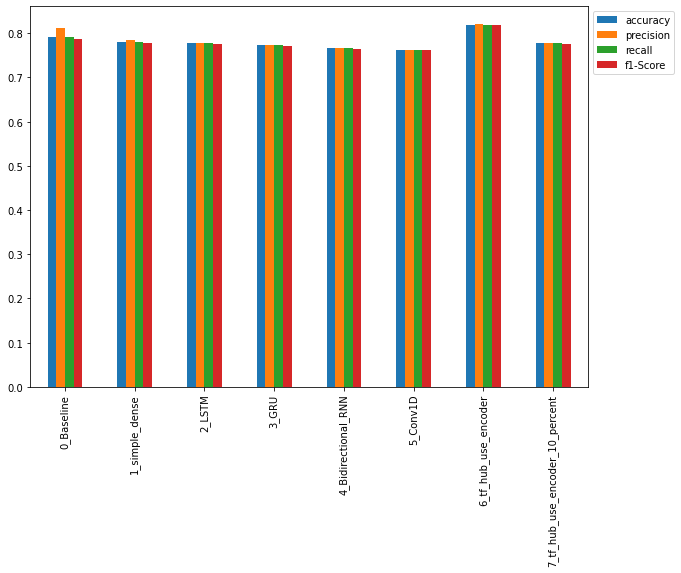

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

For a balaneced classification model f1 is the good metric to compare

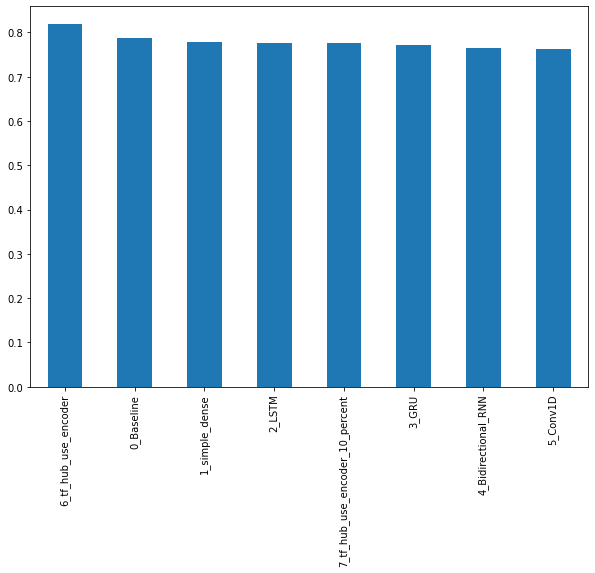

In [ ]:
# Sor the model values by f1-score
all_model_results.sort_values("f1-Score", ascending= False)["f1-Score"].plot(kind="bar",figsize=(10,7));

## Uploading our model training logs to TensorBoard.dev

In [ ]:
# Uploading Tensorflow dev records
#!tensorboard dev upload --logdir ./model_logs/ \
#--name "NLP Modelling Experiments TF Course" \
#--description " comparing the results of different model architecture" \
#--one_shot # exit the uploader once uploading is finished

In [ ]:
# # See the previous TensorBoard Dev experiments you've run...
#!tensorboard dev list

In [ ]:
# If you need to delete an experiment from TensorBoard, you can run the following:
#!tensorboard dev delete --experiment_id  SZ5DwaBFRVm4trLx2YjpjA

In [ ]:
!tensorboard dev list


***** TensorBoard Uploader *****

This will list all experiments that you've uploaded to
https://tensorboard.dev. TensorBoard.dev experiments are visible
to everyone. Do not upload sensitive data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) no


## Saving and loading Model

There are two main formats to save a model in TensorFlow
1. HDF5
2. The `SavedModel` format (this is default when using Tensorflow)

In [ ]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

In [ ]:
# Loading model with with custom Hub layer (required for HDF5 format)
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer":hub.KerasLayer})

In [ ]:
# Evaluate our loaded model performance
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 16ms/step - loss: 0.4304 - accuracy: 0.8189


[0.43041175603866577, 0.8188976645469666]

### Now save in SaveModel format


In [ ]:
model_6.save("model_6_SaveModel_format")

INFO:tensorflow:Assets written to: model_6_SaveModel_format/assets


INFO:tensorflow:Assets written to: model_6_SaveModel_format/assets


In [ ]:
# Load in a model from a saved model format
loaded_model_6_savedModel_format = tf.keras.models.load_model("model_6_SaveModel_format")

In [ ]:
loaded_model_6_savedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 20ms/step - loss: 0.4304 - accuracy: 0.8189


[0.43041184544563293, 0.8188976645469666]

### Finding the most wrong examples

* If our best model still is'nt perfect, what examples is it getting wrong?
* And of these wrong examples which ones is it getting the most wrong (those with prediction probabilities closest to te=he oppposite class)

For example if a sample should have a label of 0 but our model predicts a prediction probability of 0.999 (really close to 1) and vice a versa

In [ ]:
# Download a pretrained model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2022-02-25 08:17:10--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 142.251.5.128, 74.125.133.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  30.0MB/s    in 34s     

2022-02-25 08:17:46 (26.8 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.in

In [ ]:
# Load the model
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 15ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [ ]:
# make predictions with the loaded model
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create DataFrame with validation sentences, validation labels, and best performin models prediction + prediction probability
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10] # these are called false positive

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


Reminder of target label
`0` = not disaster
`1` = disaster

In [ ]:
most_wrong.tail() # these are called false negative

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [ ]:
# check the false positives (model predicted 1 when should have been 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

---

Target: 0, Pred: 1.0, Prob: 0.8769820928573608
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

---

Target: 0, Pred: 1.0, Prob: 0.8523000478744507
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

---

Target: 0, Pred: 1.0, Prob: 0.8354544043540955
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

---

Target: 0, Pred: 1.0, Prob: 0.8272134065628052
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

---

Target: 0, Pred: 1.0, Prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

---

Targ

In [ ]:
# check the false negatives (model predicted 1 when should have been 0)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1, Pred: 0.0, Prob: 0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

---

Target: 1, Pred: 0.0, Prob: 0.05507582053542137
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

---

Target: 1, Pred: 0.0, Prob: 0.05460337549448013
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

---

Target: 1, Pred: 0.0, Prob: 0.05459698289632797
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

---

Target: 1, Pred: 0.0, Prob: 0.04963727295398712
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

---

Target: 1, Pred: 0.0, Prob: 0.04391848295927048
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

---

Target: 1, Pred: 0.0, Prob: 0.04208682

In [ ]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


# Making predictions on test datasets

In [ ]:
# Making predictions on the test datasets and visualizing them
test_sentences = test_df["text"].to_list()
test_sentences[:10]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan',
 "We're shaking...It's an earthquake",
 "They'd probably still show more life than Arsenal did yesterday, eh? EH?",
 'Hey! How are you?',
 'What a nice hat?',
 'Fuck off!']

In [ ]:
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample])) # our model expects a list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("-----\n")


Pred: 0, prob: 0.19654707610607147
Text:
I liked a @YouTube video from @centralupload http://t.co/EwLHrTREEP Oh oh!

-----

Pred: 0, prob: 0.2903097867965698
Text:
*Hears loud bang upstairs*
*goes outside sees 2nd floor window open*
*checks every room with a baseball bat in hand*

-----

Pred: 0, prob: 0.053629592061042786
Text:
@Kyra_Elizabethh my back break light is burned out so I gotta show them in the next 10 days ??

-----

Pred: 0, prob: 0.12631909549236298
Text:
5 Seconds of Summer Is my pick for http://t.co/qcHV3JqOVK Fan Army #5SOSFAM http://t.co/gc0uDfnFgg ÌÑ2

-----

Pred: 0, prob: 0.09193257987499237
Text:
When life is cheap evil abounds and @PPact @HillaryClinton profit from its destruction.#DefundPP http://t.co/H5rzmAy8lP

-----

Pred: 0, prob: 0.061762627214193344
Text:
Fuck off!

-----

Pred: 1, prob: 0.6341486573219299
Text:
It looks like all the trees in my yard had a Britney Spears style meltdown. #Bald #Hailstorm

-----

Pred: 1, prob: 0.9922463297843933
Text:
Toda

## The speed/Score tradeOFF

In [ ]:
# Let's make a function to measure the time of prediction
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculuate how long predictons took to make
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [ ]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model=model_6_pretrained,
                                                            samples=val_sentences)
model_6_total_pred_time, model_6_time_per_pred

In [ ]:
# Calculate our baseline model times per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred


In [ ]:
# Get results for pretrained GS model
model_6_pretrained_results = calculate_results(y_true=val_labels,
                                               y_pred=model_6_pretrained_preds)
model_6_pretrained_results

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score");